In [1]:
%load_ext autoreload
%autoreload 2

# Environment prep for Colab
 - download git repo 
 - install required pip packages

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#!git clone https://github.com/kkahloots/Rethinking_Data_Effeient_GANs.git

In [4]:
!ls

100-shot-grumpy_cat
100-shot-grumpy_cat.ipynb
100-shot-medici_fountain
100-shot-medici_fountain.ipynb
100-shot-obama
100-shot-obama.ipynb
800-pokemon
800-pokemon.ipynb
monet2photo
monet2photo.ipynb


In [5]:
#!wget https://hanlab.mit.edu/projects/data-efficient-gans/datasets/AnimalFace-cat.zip 

In [6]:
#!mkdir  Rethinking_Data_Effeient_GANs/data/.AnimalFace-cat
#!mkdir  "Rethinking_Data_Effeient_GANs/data/.AnimalFace-cat/1"

In [7]:
#!unzip ./AnimalFace-cat.zip -d "Rethinking_Data_Effeient_GANs/data/.AnimalFace-cat/1"

In [8]:
#!rm -rf ./AnimalFace-cat.zip

# Connect Drive to save and restore results

# Settings

In [5]:
%env TF_KERAS = 1
import os
sep_local = os.path.sep

import sys
print(sep_local)

env: TF_KERAS=1
\


In [6]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [7]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [8]:
os.getcwd()

'C:\\Users\\Kriple\\PycharmProjects\\pythonProject\\Rethinking_Data_Effeient_GANs\\notebooks\\3DAugmentationDemo'

In [9]:
os.chdir('../../')
print(os.getcwd())

C:\Users\Kriple\PycharmProjects\pythonProject\Rethinking_Data_Effeient_GANs


# only on colab

# Dataset loading

In [10]:
#!pip install -q colorlog tqdm Augmentor livelossplot

In [11]:
from generators.from_images.file_image_generator import get_generators, create_image_lists

In [12]:
dataset_name='800-pokemon'
inputs_shape= image_shape=(256, 256, 3)
batch_size = 36
latents_dim = 256
intermediate_dim = 50
img_dir = f'data/.{dataset_name}'

In [14]:
files = [f"{img_dir}/a/{f}" for f in os.listdir(img_dir+'/a') ]
import cv2
padding = 10
top, bottom = padding, padding
left, right = padding, padding
for f in files:
    image_cv = cv2.resize(cv2.imread(f, cv2.IMREAD_COLOR), (256, 256))
    color = [0, 0, 0]

    image_cv = cv2.resize(cv2.copyMakeBorder(image_cv, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color), (256, 256))
    cv2.imwrite(f, image_cv)

In [18]:
restore_path = f'./saved_models/{dataset_name}'

In [19]:
from pathlib import Path
Path(restore_path).mkdir(parents=True, exist_ok=True)

In [20]:
import pickle

In [21]:
try:
    imgs_list = pickle.load(open(f'{restore_path}/{dataset_name}_images_list.pkl', 'rb'))
except:
    imgs_list = create_image_lists(
    image_dir=img_dir, 
    validation_pct=0, 
    valid_imgae_formats='png')
    pickle.dump(imgs_list, open(f'{restore_path}/{dataset_name}_images_list.pkl', 'wb'))


In [22]:
train_generator, val_generator = get_generators(
        images_list=imgs_list, 
        image_shape=image_shape, 
        image_dir=img_dir,
        batch_size=batch_size,
        episode_len=None,
        episode_shift=None,
        class_mode=None
        )

  INFO     | Found 800 training files
  INFO     | Found 0 validation files


In [23]:
from utils.utils import img_merge
from PIL import Image
import numpy as np

C:\Users\Kriple\PycharmProjects\pythonProject\Rethinking_Data_Effeient_GANs\utils\utils.py:33: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [24]:
batch = next(train_generator)
image_grid = img_merge(batch.numpy(), n_rows=6).squeeze()

In [25]:
batch.shape

TensorShape([36, 256, 256, 3])

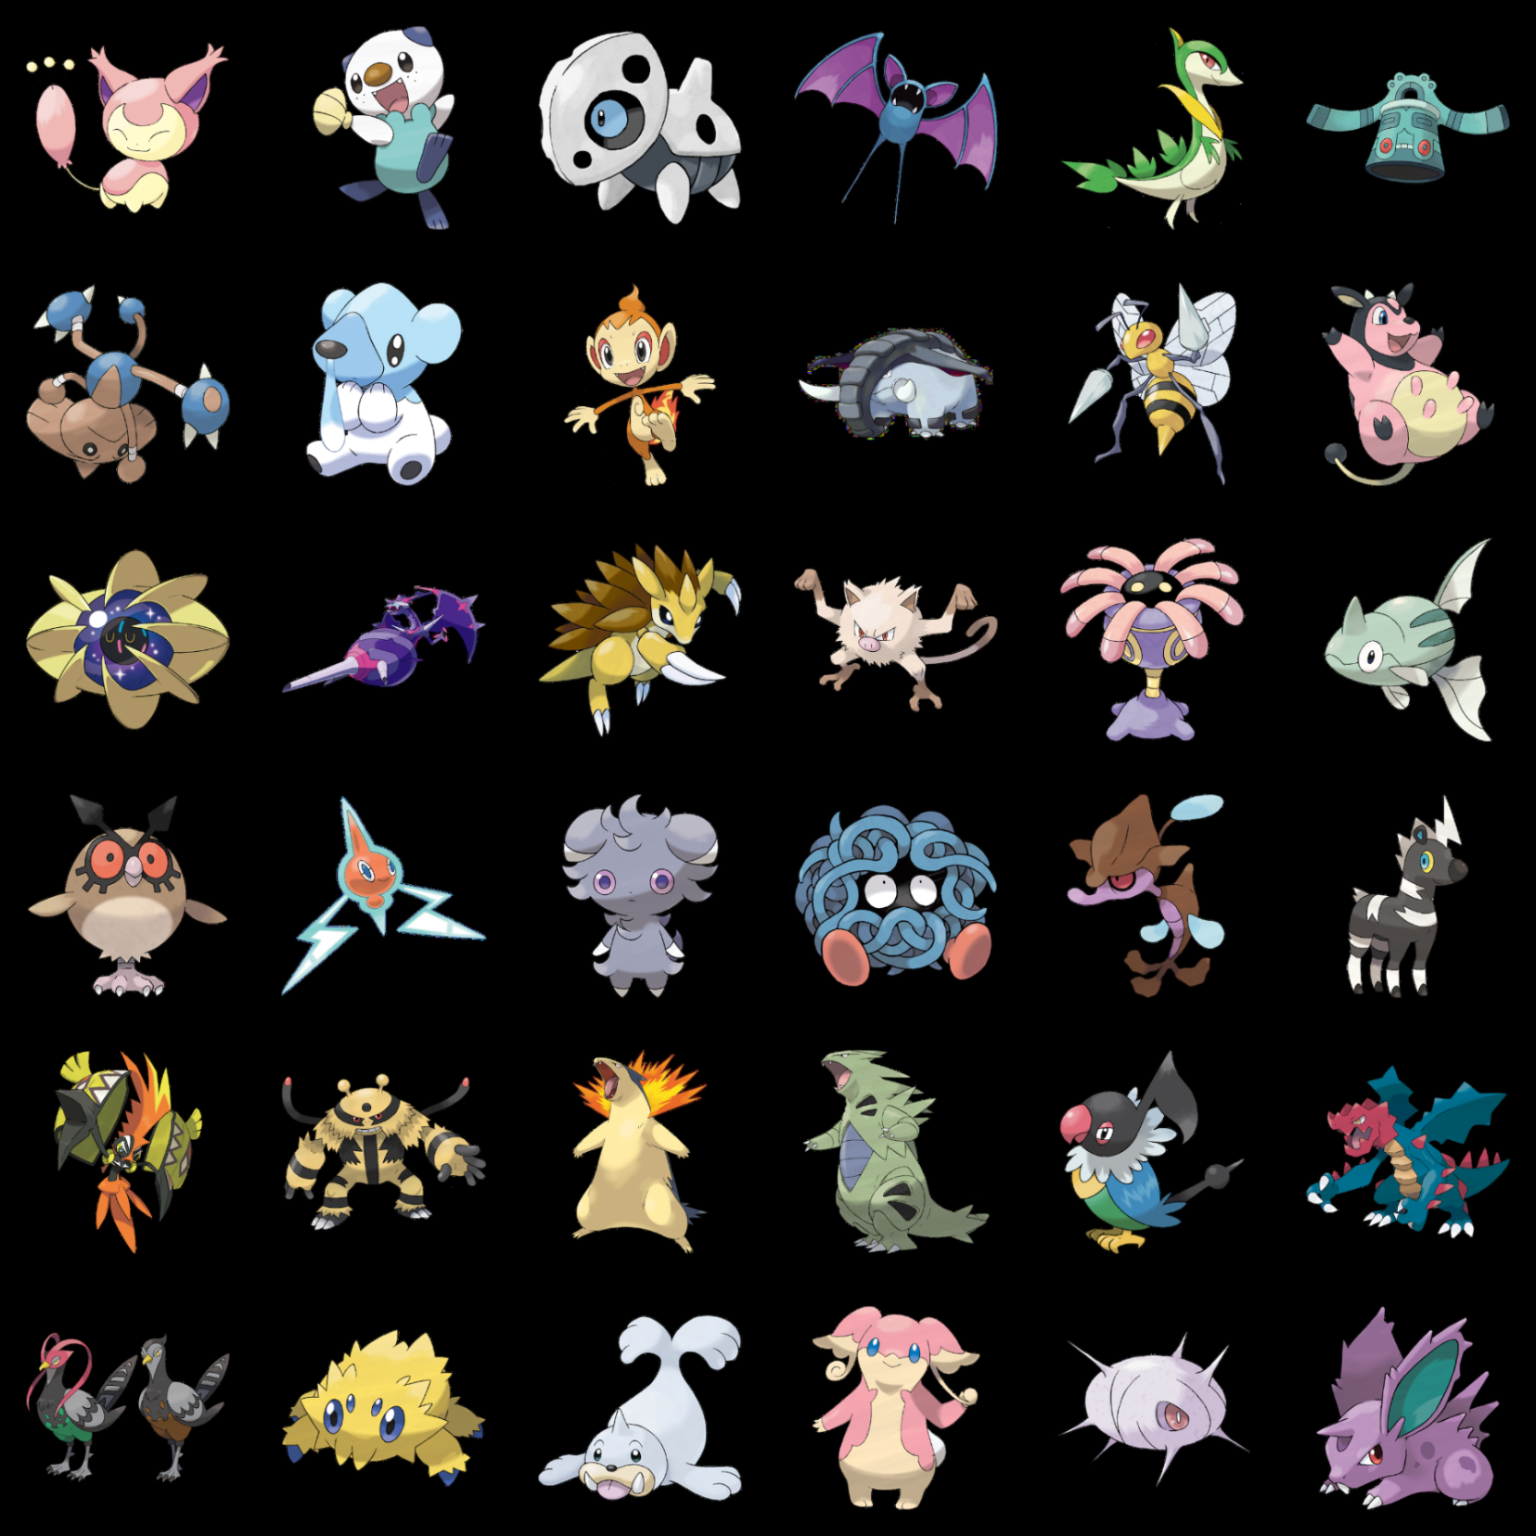

In [26]:
Image.fromarray(image_grid)

In [27]:
from augmentation.Augmentor import augmentation3d_functions
import augmentation.ThreeDimension_Presective as td_pres_aug
from augmentation.Augmentor import photo_aug_list
from tqdm.notebook import tqdm 
import random

In [28]:
scales = [a/100 for a in range(80, 121)]

In [29]:
for func_list in tqdm(augmentation3d_functions[::-1]):
    print("=======================================")
    aug_batch = batch
    
    done = True
    while done:
        fn = random.choice(func_list)
        if fn in photo_aug_list:
            continue
        else:    
            done = False
            
    aug_patch_fn = lambda x: td_pres_aug.aug_bg_patches(x, scales, fn)
    
    aug_func_name = str([f.__name__ for f in func_list])
    aug_func_name = aug_func_name.replace(fn.__name__, f"3d{fn.__name__}")
    aug_func_name = aug_func_name.replace('[', '').replace(']', '').replace(',', '').replace(' ', '_').replace("'", '')
    print(aug_func_name)
    print()
    
    for f in tqdm(func_list):
        if fn == f:
            aug_batch = aug_patch_fn(aug_batch)
        else:    
            aug_batch = f(aug_batch)
                
    aug_batch = img_merge(aug_batch.numpy(), n_rows=6).squeeze() 
    aug_batch = Image.fromarray(aug_batch)
    aug_batch.save( f"./notebooks/3DAugmentationDemo/{dataset_name}/{aug_func_name}.jpg", "JPEG")
    


3ddistort_random_shear_top_right_clone_flip_left_right




add_random_contrast_shear_top_down_random_3dtransform_color_space_clone




add_random_contrast_3dskew_top_down_random_clone_flip_left_right




flip_left_right_3dskew_left_right_random_add_random_brightness_transform_color_space_clone




distort_random_add_random_brightness_3dshear_top_right_clone




skew_down_left_flip_left_right_distort_random_add_random_brightness_3dtransform_color_space




3dskew_top_down_random_transform_color_space_clone



UnknownError: KeyboardInterrupt: 
Traceback (most recent call last):

  File "C:\ProgramData\Anaconda3\envs\GPUEnv\lib\site-packages\tensorflow\python\ops\script_ops.py", line 242, in __call__
    return func(device, token, args)

  File "C:\ProgramData\Anaconda3\envs\GPUEnv\lib\site-packages\tensorflow\python\ops\script_ops.py", line 131, in __call__
    ret = self._func(*args)

  File "C:\ProgramData\Anaconda3\envs\GPUEnv\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 302, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\Kriple\PycharmProjects\pythonProject\Rethinking_Data_Effeient_GANs\augmentation\ThreeDimension_Presective.py", line 111, in _py_detect_patches
    bg = cv2.cvtColor(aug_fun(tf.expand_dims(bg, 0)).numpy()[0].astype(np.uint8), cv2.IMREAD_COLOR)

  File "C:\Users\Kriple\PycharmProjects\pythonProject\Rethinking_Data_Effeient_GANs\augmentation\Augmentor.py", line 158, in skew_top_down_random
    x = trans_aug.skew_top_down(x, t_shear_lambda=ll/random.choice(d_scales), d_shear_lambda=lr/random.choice(d_scales))

  File "C:\Users\Kriple\PycharmProjects\pythonProject\Rethinking_Data_Effeient_GANs\augmentation\Translation.py", line 74, in skew_top_down
    images = transformImg(images, [[1.0, t_shear_lambda + d_shear_lambda, 0], [0, 1.0, 0], [0, 0, 1.0]])

  File "C:\Users\Kriple\PycharmProjects\pythonProject\Rethinking_Data_Effeient_GANs\augmentation\Translation.py", line 180, in transformImg
    return tfa.image.transform(imgIn, t, interpolation="BILINEAR")

  File "C:\ProgramData\Anaconda3\envs\GPUEnv\lib\site-packages\tensorflow_addons\image\transform_ops.py", line 108, in transform
    output = tf.raw_ops.ImageProjectiveTransformV2(

  File "C:\ProgramData\Anaconda3\envs\GPUEnv\lib\site-packages\tensorflow\python\util\tf_export.py", line 404, in wrapper
    return f(**kwargs)

  File "C:\ProgramData\Anaconda3\envs\GPUEnv\lib\site-packages\tensorflow\python\ops\gen_image_ops.py", line 2258, in image_projective_transform_v2
    _result = pywrap_tfe.TFE_Py_FastPathExecute(

KeyboardInterrupt

 [Op:EagerPyFunc]